<a href="https://colab.research.google.com/github/wanloc04/Mapper_n_BallMapper/blob/main/Survey_CM_BM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mapper algorithm

In [ ]:
!pip install numpy matplotlib kmapper scikit-learn

Tập dữ liệu dạng số 8

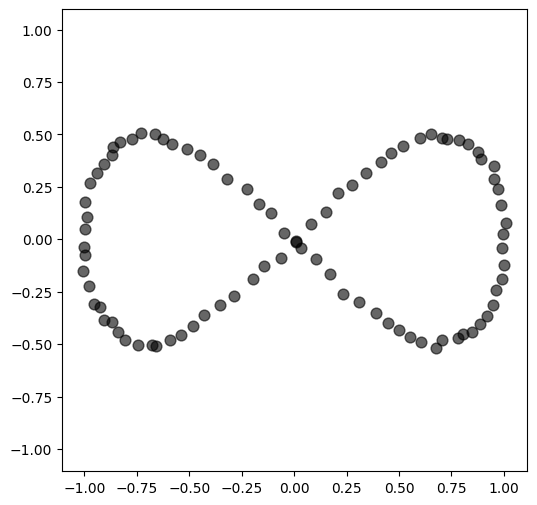

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: PCA(n_components=1)
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (90, 2)

..Projecting data using: 
	PCA(n_components=1)


..Scaling with: MinMaxScaler()

Mapping on data shaped (90, 2) using lens shaped (90, 1)

Creating 7 hypercubes.

Created 10 edges and 9 nodes in 0:00:00.020029.
Wrote visualization to: mapper_output.html
Kết quả đã được lưu dưới dạng tệp HTML: mapper_output.html


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import kmapper as km
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Bước 1: Tạo đám mây điểm dạng số 8 (như trước đó)
num_points = 90
t = np.linspace(0, 2 * np.pi, num_points)

x = np.sin(t)
y = np.sin(t) * np.cos(t)


# Thêm nhiễu ngẫu nhiên
noise_scale = 0.01
x += np.random.normal(scale=noise_scale, size=num_points)
y += np.random.normal(scale=noise_scale, size=num_points)

# Hiển thị đám mây điểm
plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=60, color='black', alpha=0.6)
plt.axis('equal')
plt.show()

# Tạo dữ liệu đầu vào cho thuật toán Mapper
data = np.column_stack((x, y))

# Bước 2: Khởi tạo đối tượng Mapper
mapper = km.KeplerMapper(verbose=1)

# Bước 3: Ánh xạ dữ liệu qua len
lens = mapper.fit_transform(data, projection=PCA(n_components=1))

# Bước 4: Áp dụng thuật toán Mapper
graph = mapper.map(lens, data, cover=km.Cover(n_cubes=7, perc_overlap=0.3), clusterer=DBSCAN(eps=0.5, min_samples=4))

# Bước 5: Hiển thị kết quả dưới dạng đồ thị mạng lưới
mapper.visualize(graph, path_html="mapper_output.html", title="Mapper Output for Number 8 Shape")

print("Kết quả đã được lưu dưới dạng tệp HTML: mapper_output.html")

# Giả sử data là dữ liệu bạn đã tạo
dbscan = DBSCAN(eps=0.5, min_samples=4)
labels = dbscan.fit_predict(data)


In [ ]:
from google.colab import files

# Tải tệp mapper_output.html xuống
files.download('mapper_output.html')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Ball Mapper algorithm

In [ ]:
!pip install pyballmapper

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline

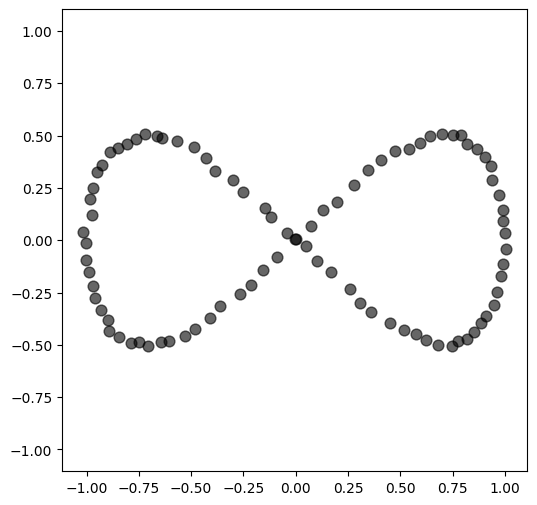

In [ ]:
# Bước 1: Tạo đám mây điểm dạng số 8 (như trước đó)
num_points = 90
t = np.linspace(0, 2 * np.pi, num_points)

x = np.sin(t)
y = np.sin(t) * np.cos(t)


# Thêm nhiễu ngẫu nhiên
noise_scale = 0.01
x += np.random.normal(scale=noise_scale, size=num_points)
y += np.random.normal(scale=noise_scale, size=num_points)

# Hiển thị đám mây điểm
plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=60, color='black', alpha=0.6)
plt.axis('equal')
plt.show()

In [ ]:
data = np.column_stack((x, y))

In [ ]:
from pyballmapper import BallMapper

In [ ]:
bm = BallMapper( X=data, eps=0.5)
print(bm.Graph.nodes)

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [ ]:
print(bm.points_covered_by_landmarks[1])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [ ]:
bm.points_and_balls()

,point,ball
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
157,83,8
158,84,8
159,85,8
160,86,8


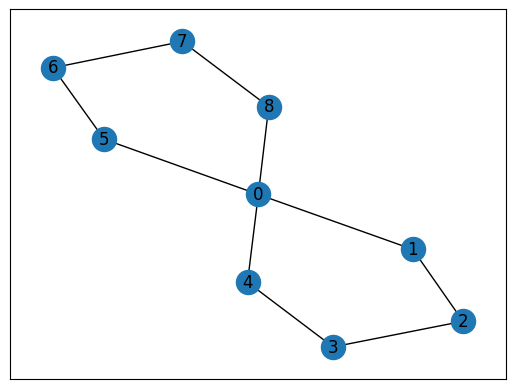

In [ ]:
nx.draw_networkx(bm.Graph, pos=nx.spring_layout(bm.Graph, seed=24))